[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WarrenTseng/genai_tutorials/blob/main/MONAI/Brain_LDM/MONAI_GenAI_15mins.ipynb)

## Install Requirements

In [ ]:
!pip install monai fire
!git clone https://github.com/Project-MONAI/GenerativeModels.git
%cd GenerativeModels/
!python setup.py install

## Import and check the installation

In [ ]:
import monai
import generative
import gdown
import numpy as np
import matplotlib.pyplot as plt

monai.__version__, generative.__version__

## To to the target dir and download pre-trained models

In [ ]:
%cd model-zoo/models/brain_image_synthesis_latent_diffusion_model
!mkdir models
%cd models

In [ ]:
import gdown
url = "https://drive.google.com/uc?export=download&id=1CZHwxHJWybOsDavipD0EorDPOo_mzNeX"
output = "autoencoder.pth"
gdown.download(url, output, quiet=False)

url = "https://drive.google.com/uc?export=download&id=1XO-ak93ZuOcGTCpgRtqgIeZq3dG5ExN6"
output = "diffusion_model.pth"
gdown.download(url, output, quiet=False)
!ls

## Synthetic data generation

In [ ]:
%cd ..

In [ ]:
!python -m monai.bundle run save_nii --config_file configs/inference.json --gender 1.0 --age 0.7 --ventricular_vol 0.7 --brain_vol 0.5

In [ ]:
!ls output

## Preview the synthetic image

In [ ]:
loader = monai.transforms.LoadImage()
file_path = './output/sample_070659_23112023_1.0_0.7_0.7_0.5.nii.gz'
img = loader(file_path).numpy()

In [ ]:
img.shape

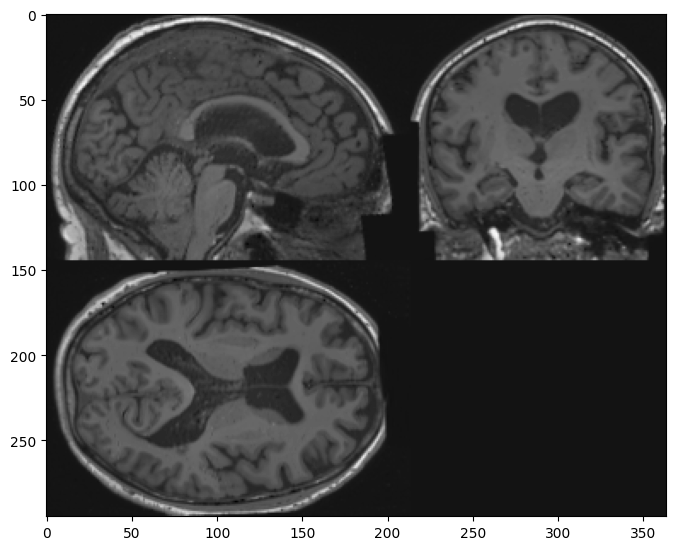

In [ ]:
_combined1 = np.concatenate([img[img.shape[0]//2].transpose([1, 0])[::-1],
                           img[:, img.shape[1]//2].transpose([1, 0])[::-1]], axis=1)
temp = np.ones([img.shape[0], img.shape[0]])*img[0, 0, 0]
_combined2 = np.concatenate([img[:, :, img.shape[2]//2], temp], axis=1)
combined = np.concatenate([_combined1, _combined2])
plt.figure(figsize=(8, 8))
plt.imshow(combined, cmap='gray')